## Gc negative graph

imports "article_neg1.gml"
- saves "nodes_df_negative.csv"
    - node labels, degrees, and centralities for entire network
- saves "Gc_negative.gml"

imports "Gc_negative.gml"
- saves "Gc_df_neg.csv"
    - node labels, degrees, and centralities for greatest component

In [123]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

gml_files = glob('../output/network/article_neg1.gml')

In [124]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info
    #plt.figure(figsize=(10,10))
    #nx.draw_spring(graph, arrows=True, with_labels=True)

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

- - -

# all nodes table

In [125]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [126]:
# graph = directed, ugraph = undirected
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    ugraph = graph.to_undirected() # to undirected graph
    U = graph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    calculate_graph_inf(ugraph)

    ## calculate variables and save into list
    sent = "neg"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    combined_df = combined_df.append(df)

----------
../output/network/article_neg1.gml
Name: article_neg1.gml
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099
Name: article_neg1.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


In [127]:
# what the network looks like without adding back edges e = U.edges()

#for graph_num, gml_graph in enumerate(gml_files):
#    graph2 = nx.read_gml(gml_graph)
#    ugraph2 = graph.to_undirected() # to undirected graph
#    U2 = graph.to_undirected(reciprocal=True)
#    (filepath, filename) = os.path.split(gml_graph)
#    print('-' * 10)
#    print(gml_graph)
#    calculate_graph_inf(graph2)
#    calculate_graph_inf(ugraph2)

In [128]:
# print entire network
combined_df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,article_neg1.gml,neg,ACIP,1,0.000796,0.000000e+00,0.077104
1,article_neg1.gml,neg,ACIP's rotavirus use recommendation,1,0.000796,0.000000e+00,0.000000
2,article_neg1.gml,neg,ADHD,1,0.000796,0.000000e+00,0.102970
3,article_neg1.gml,neg,AIDS,1,0.000796,0.000000e+00,0.000000
4,article_neg1.gml,neg,African American males,2,0.001592,0.000000e+00,0.105347
5,article_neg1.gml,neg,African women,3,0.002389,2.008949e-06,0.000796
6,article_neg1.gml,neg,African-American children,1,0.000796,0.000000e+00,0.000000
7,article_neg1.gml,neg,Alysia Osoff,6,0.004777,4.250514e-04,0.097385
8,article_neg1.gml,neg,America,2,0.001592,1.903215e-06,0.001433
9,article_neg1.gml,neg,American Academy of Pediatrics,2,0.001592,2.170723e-04,0.095888


In [129]:
# save
combined_df.to_csv('../output/df/nodes_df_negative.csv')

- - -

# Draw network

In [22]:
# 7_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# for undirected graphs
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# for directed graphs
def describeGraph_d(graph):
    components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')


Graph has 1898 edges, 1257 nodes, 49 connected components

Drawing graph of size 1257:


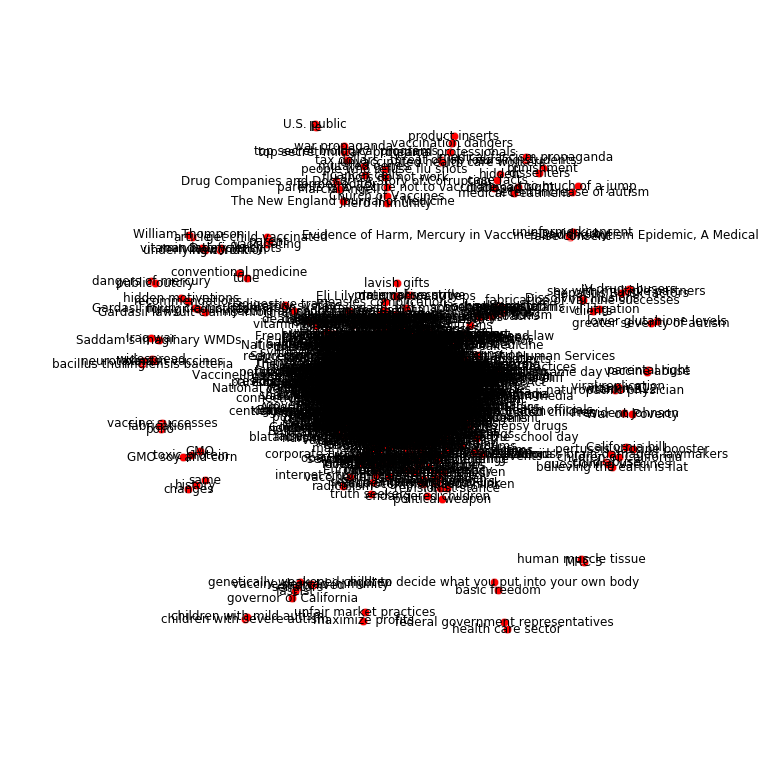

Drawing component of size 1140:


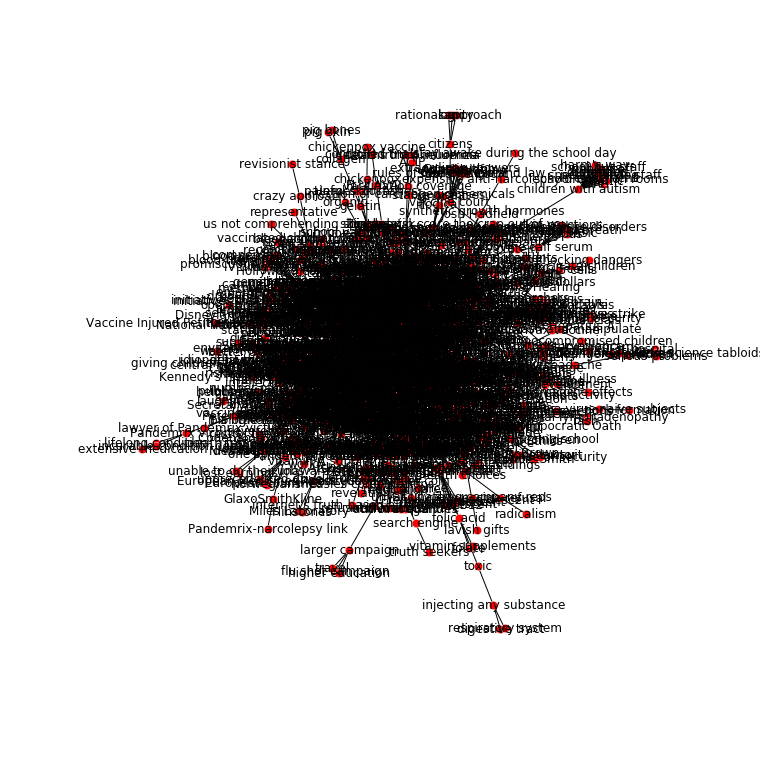

Drawing component of size 7:


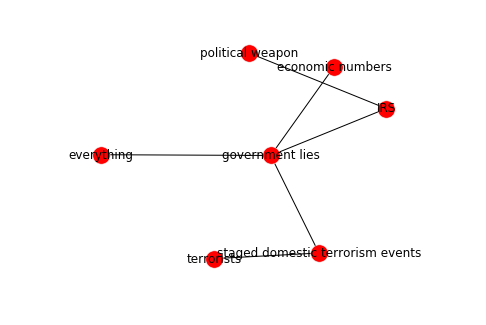

Drawing component of size 4:


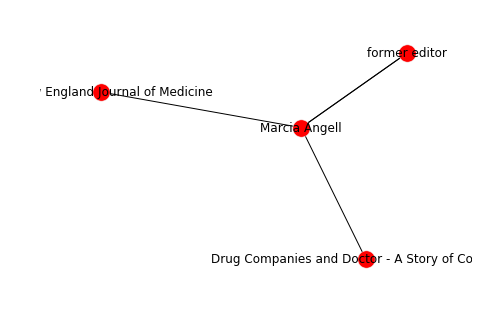

Drawing component of size 4:


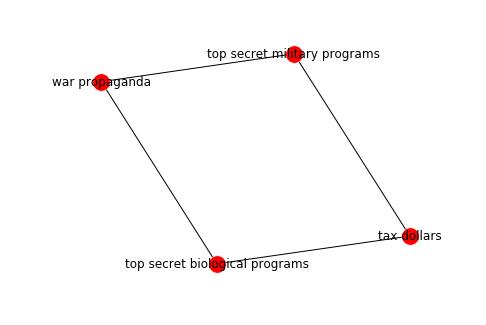

Drawing component of size 4:


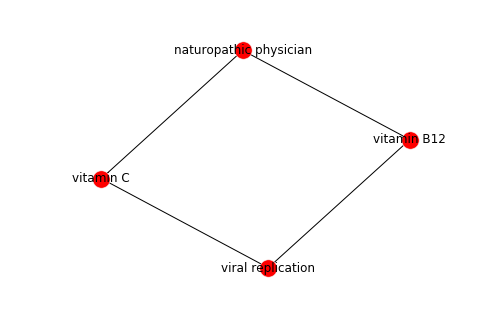

Drawing component of size 3:


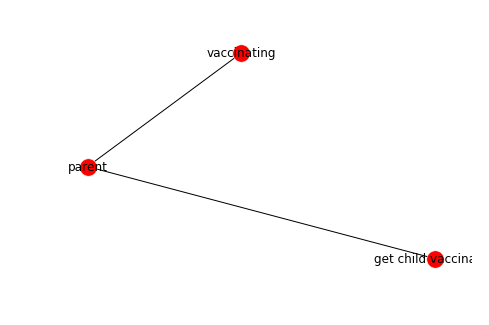

Drawing component of size 3:


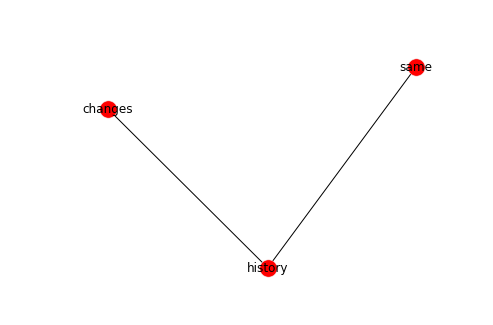

Drawing component of size 3:


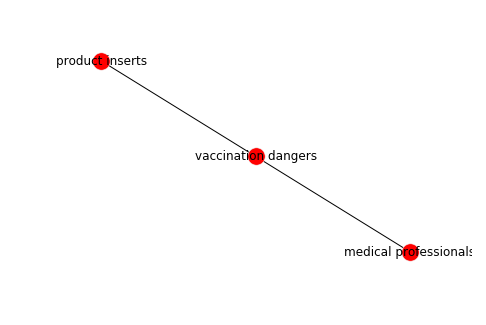

Drawing component of size 3:


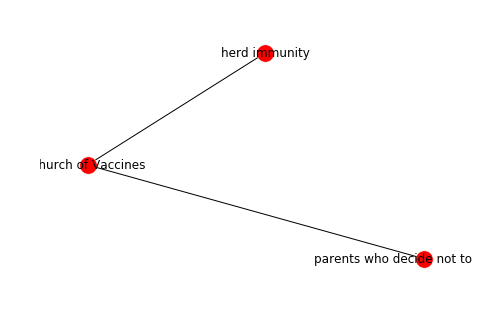

Drawing component of size 3:


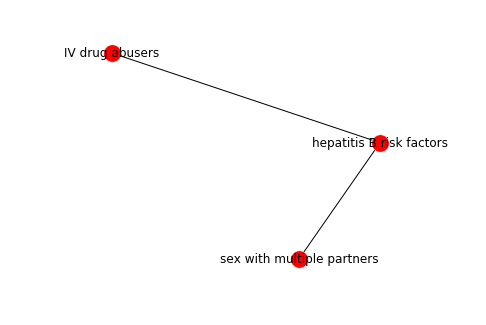

Drawing component of size 3:


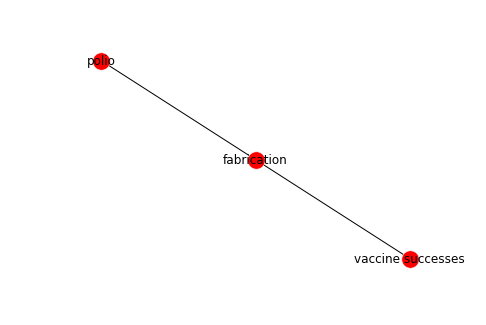

Drawing component of size 3:


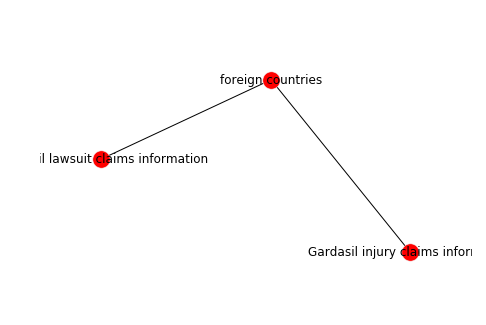

Drawing component of size 3:


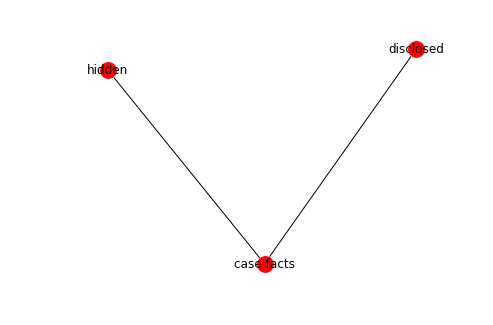

Drawing component of size 3:


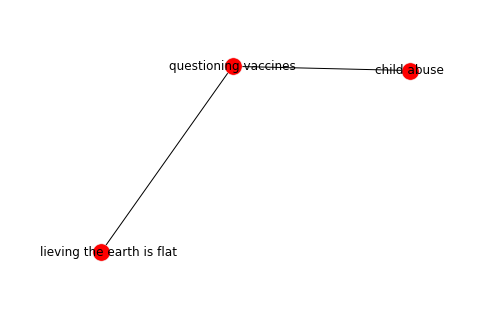

Drawing component of size 3:


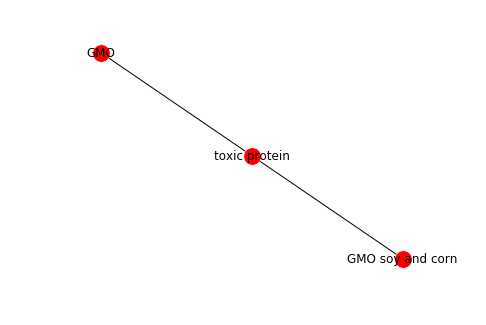

Drawing component of size 2:


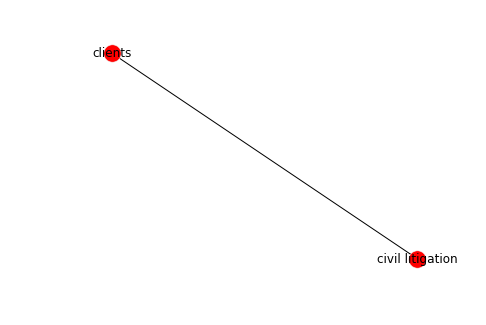

Drawing component of size 2:


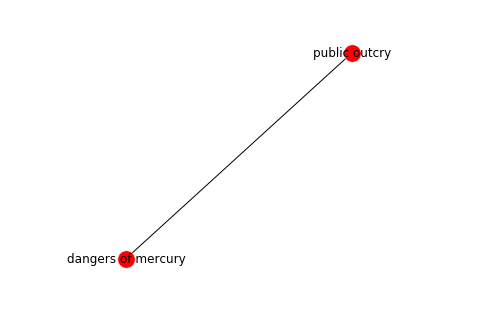

Drawing component of size 2:


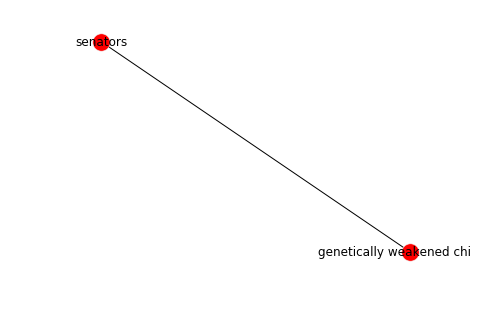

Drawing component of size 2:


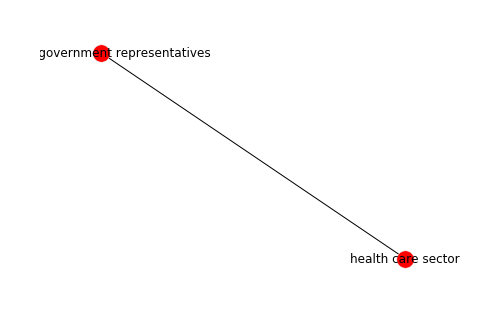

Drawing component of size 2:


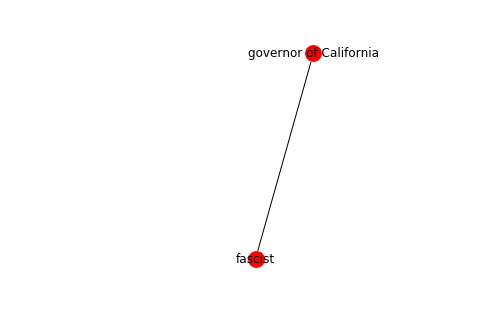

Drawing component of size 2:


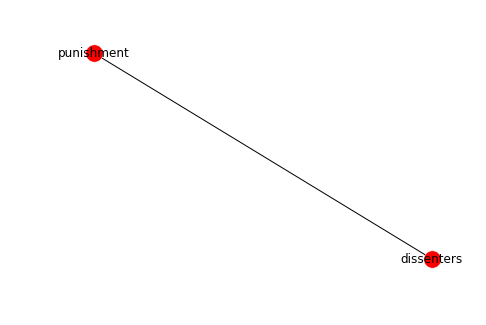

Drawing component of size 2:


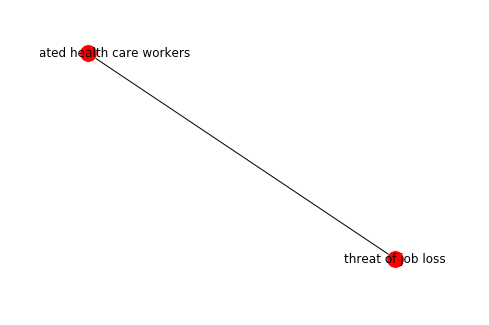

Drawing component of size 2:


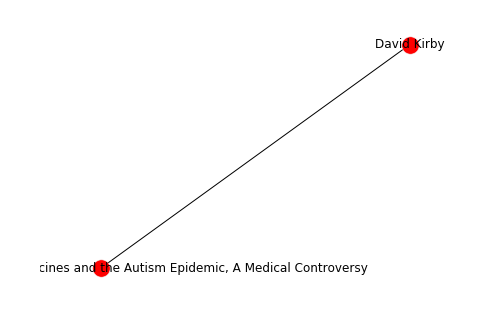

Drawing component of size 2:


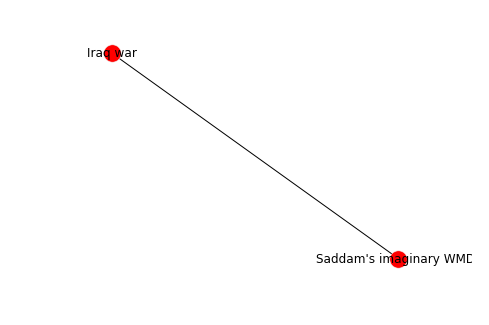

Drawing component of size 2:


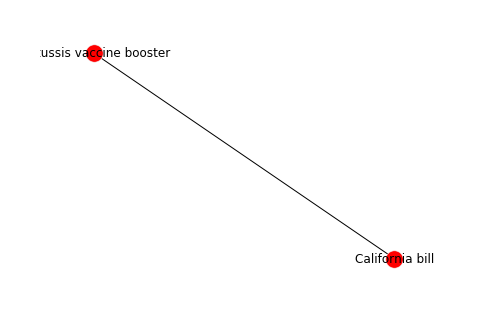

Drawing component of size 2:


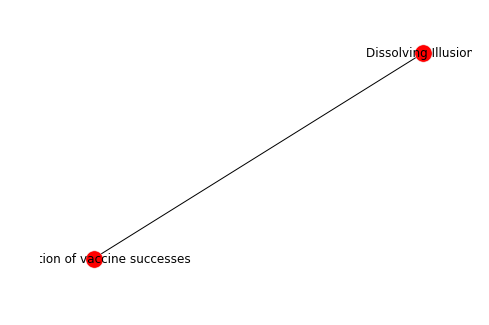

Drawing component of size 2:


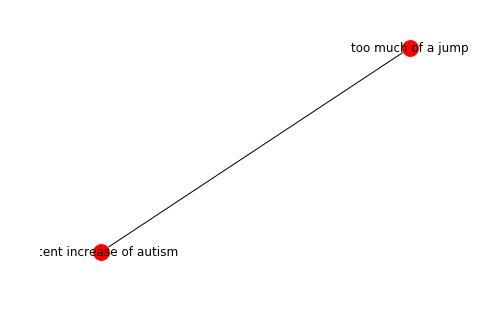

Drawing component of size 2:


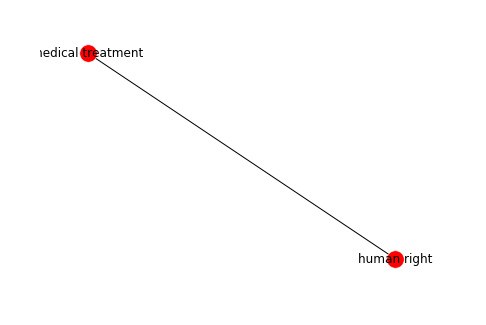

Drawing component of size 2:


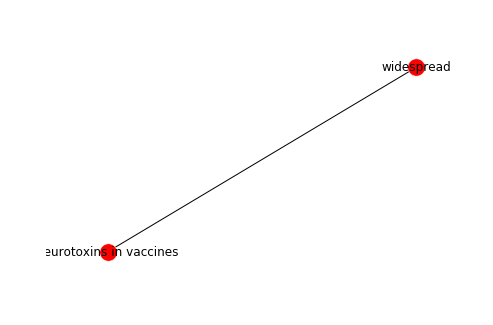

Drawing component of size 2:


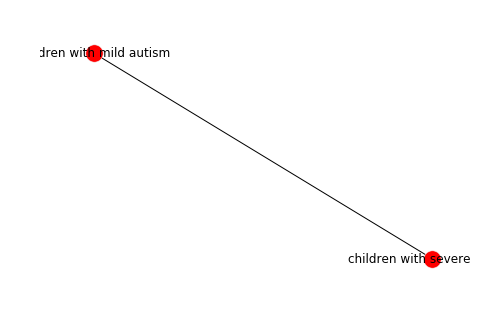

Drawing component of size 2:


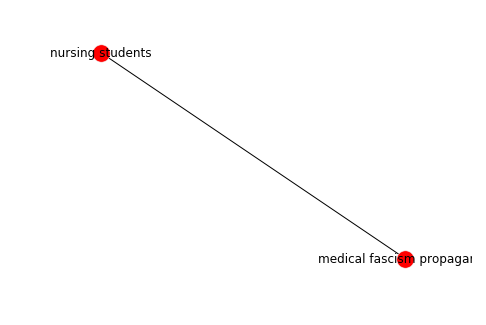

Drawing component of size 2:


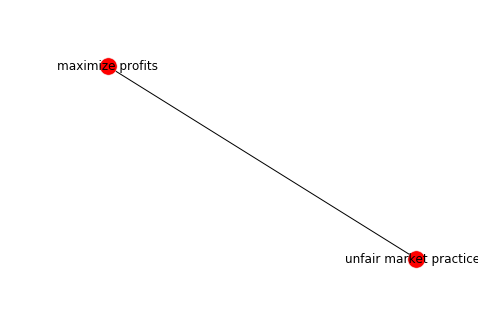

Drawing component of size 2:


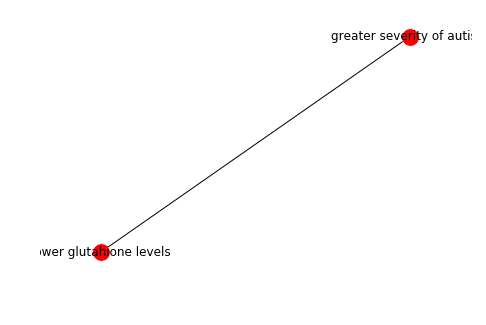

Drawing component of size 2:


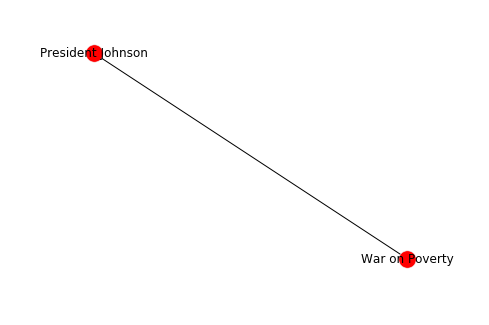

Drawing component of size 2:


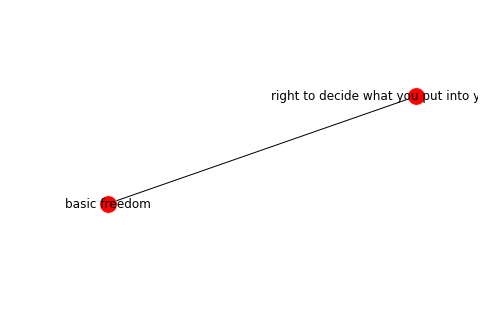

Drawing component of size 2:


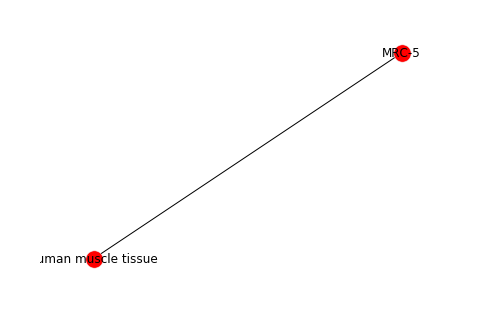

Drawing component of size 2:


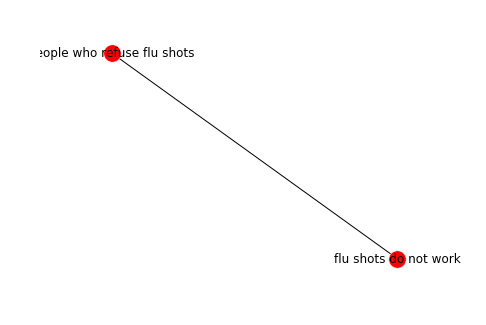

Drawing component of size 2:


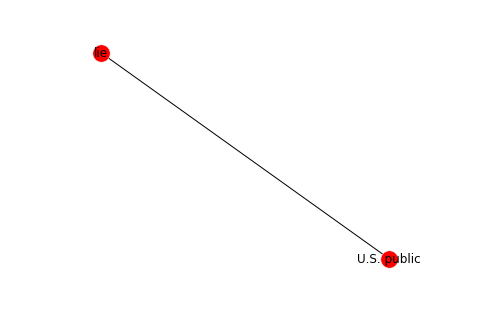

Drawing component of size 2:


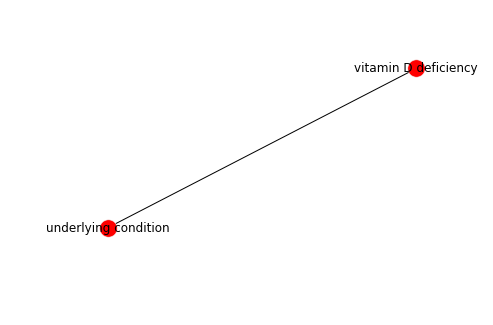

Drawing component of size 2:


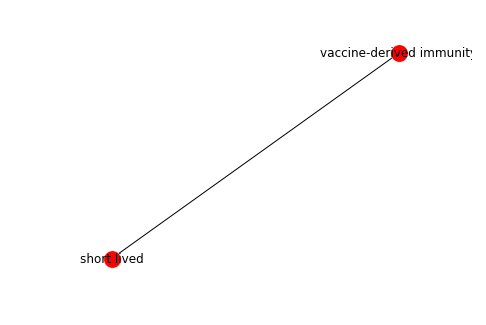

Drawing component of size 2:


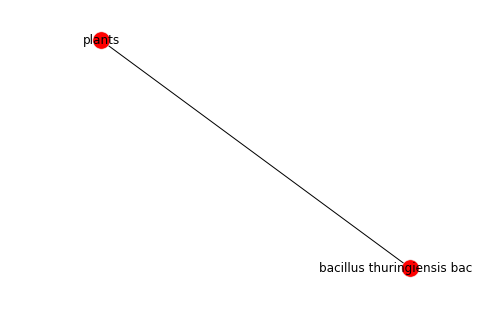

Drawing component of size 2:


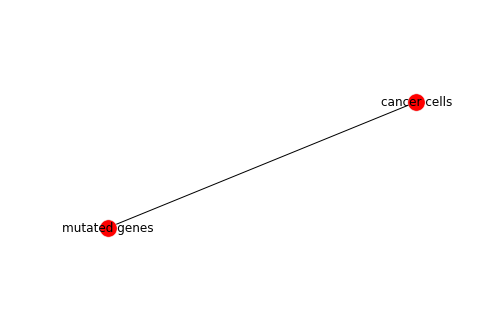

Drawing component of size 2:


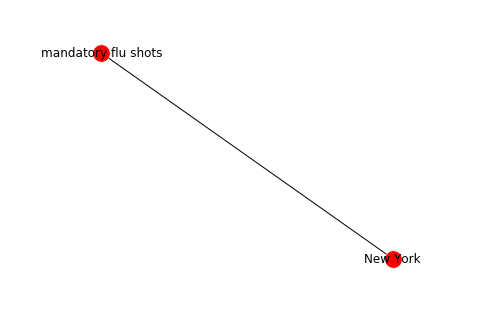

Drawing component of size 2:


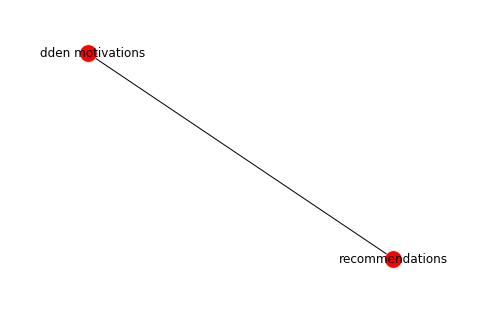

Drawing component of size 2:


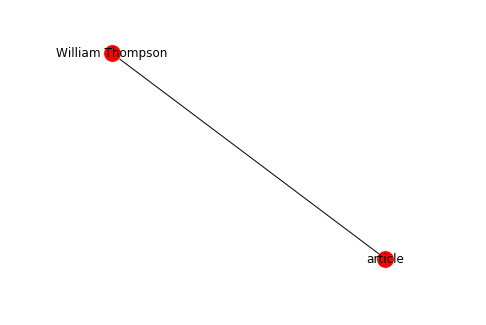

Drawing component of size 2:


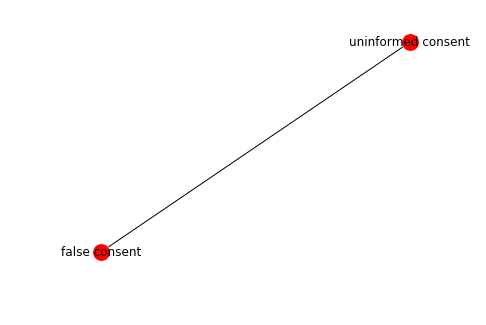

Drawing component of size 2:


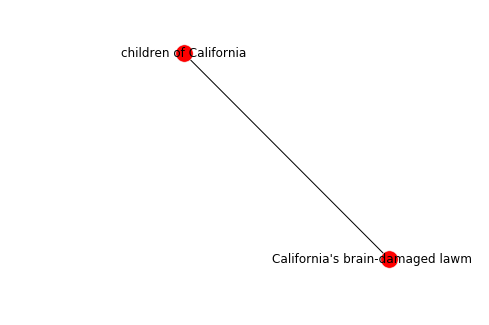

Drawing component of size 2:


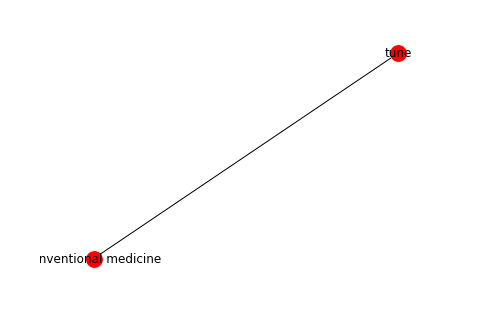

Drawing component of size 2:


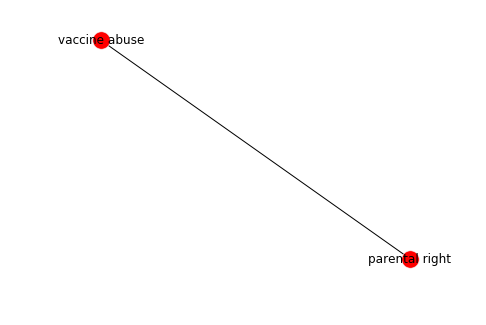

In [23]:
# UNDIRECTED network graph
describeGraph(ugraph)

Graph has 1898 edges, 1257 nodes, 49 connected components

Drawing graph of size 1257:


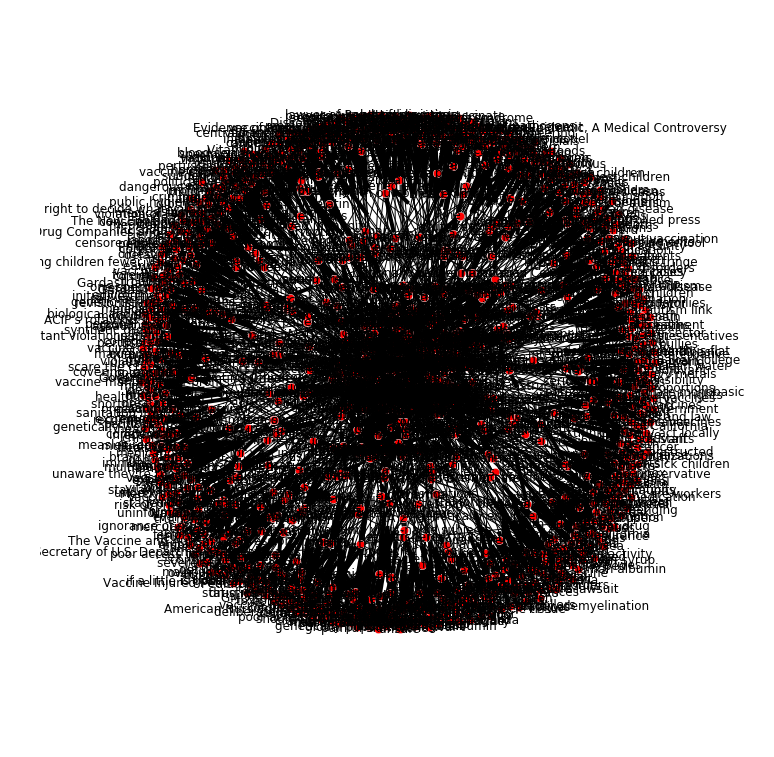

Drawing component of size 1140:


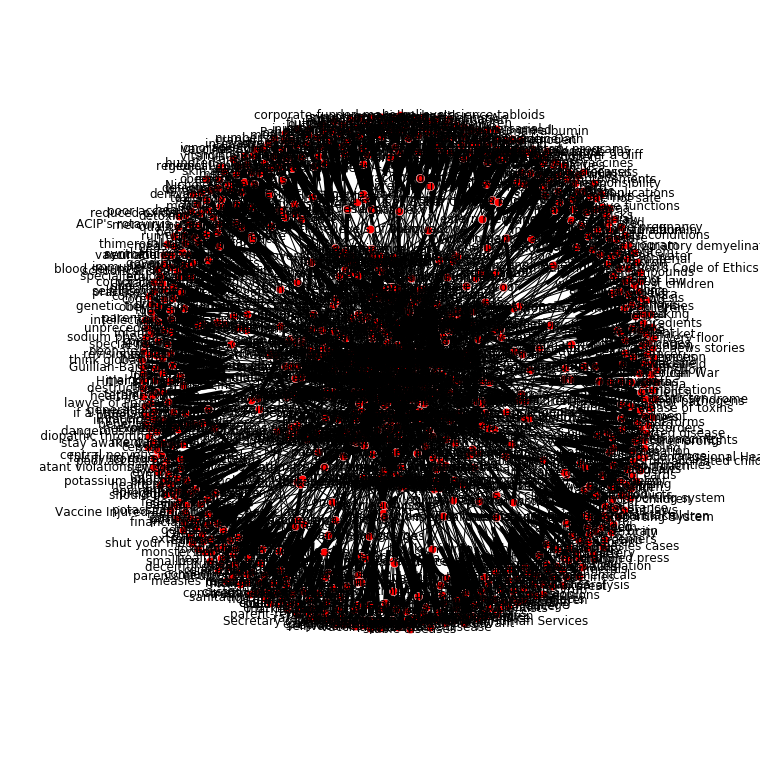

Drawing component of size 7:


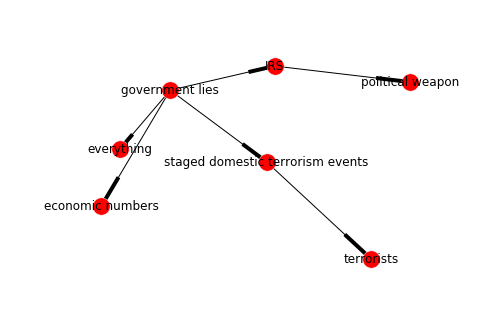

Drawing component of size 4:


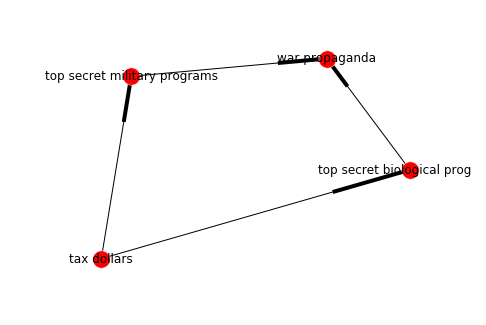

Drawing component of size 4:


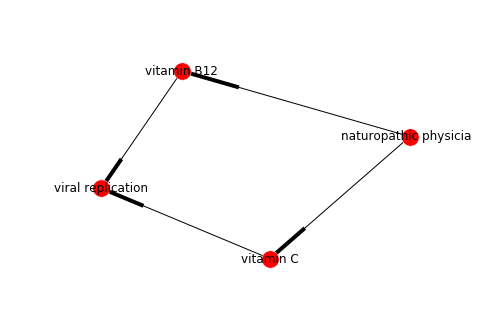

Drawing component of size 4:


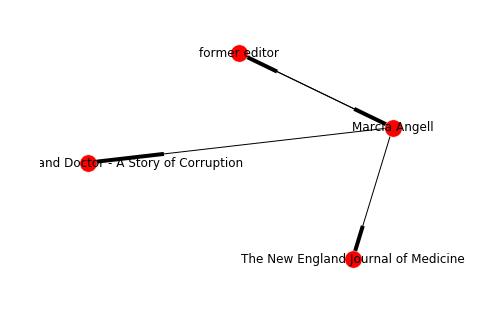

Drawing component of size 3:


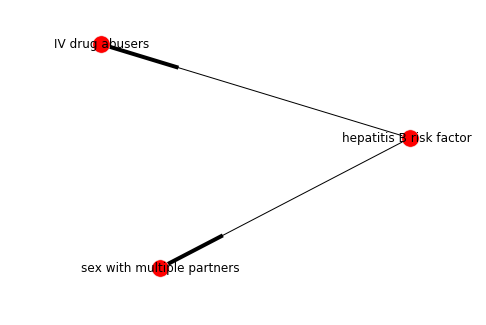

Drawing component of size 3:


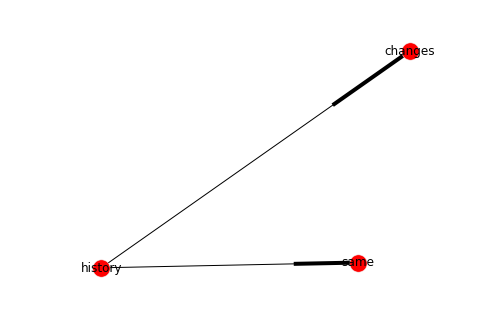

Drawing component of size 3:


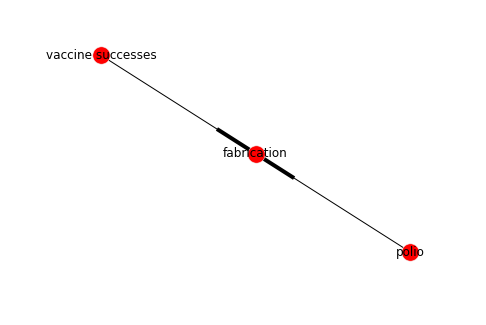

Drawing component of size 3:


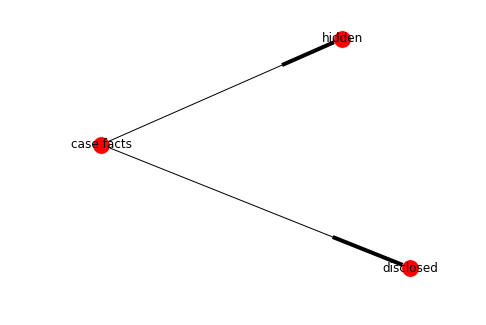

Drawing component of size 3:


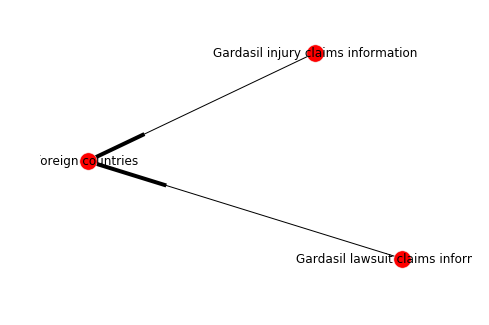

Drawing component of size 3:


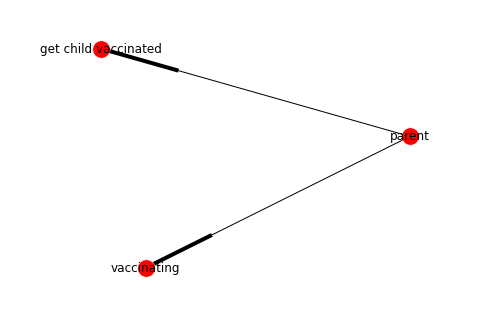

Drawing component of size 3:


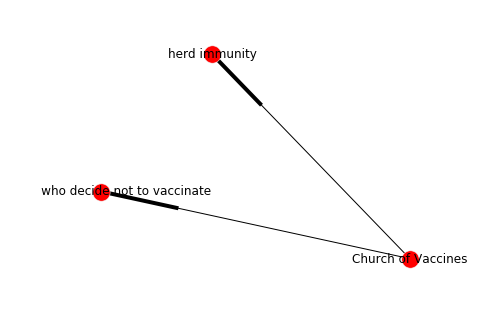

Drawing component of size 3:


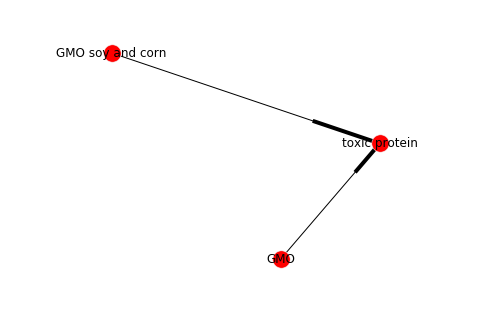

Drawing component of size 3:


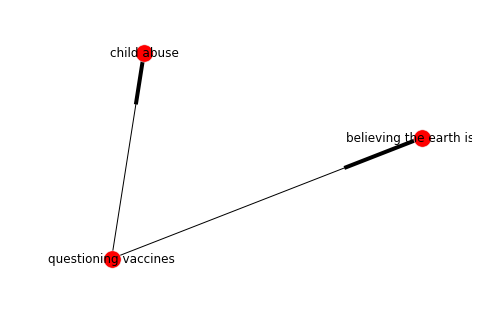

Drawing component of size 3:


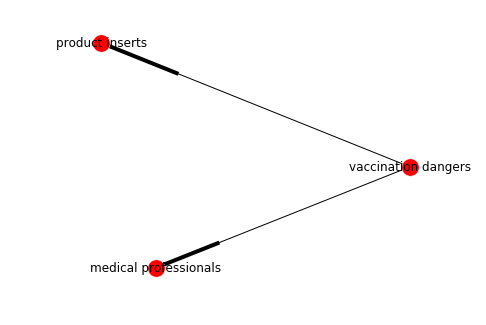

Drawing component of size 2:


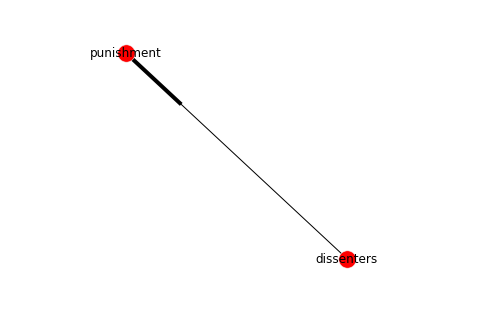

Drawing component of size 2:


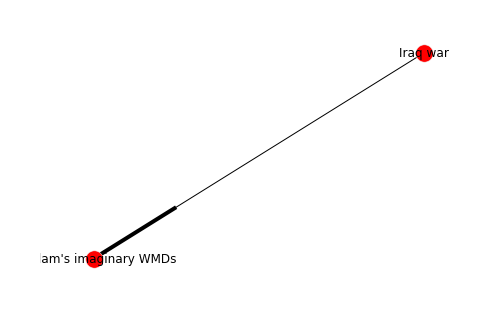

Drawing component of size 2:


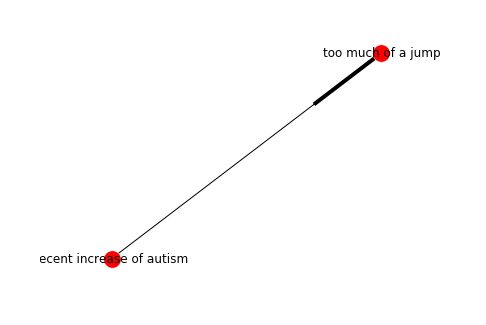

Drawing component of size 2:


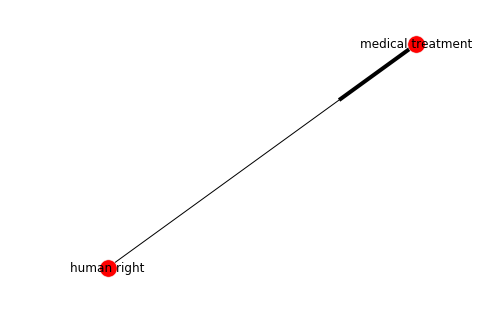

Drawing component of size 2:


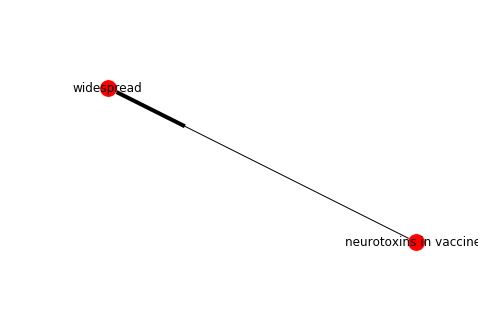

Drawing component of size 2:


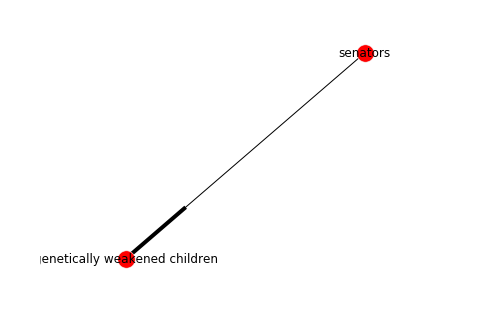

Drawing component of size 2:


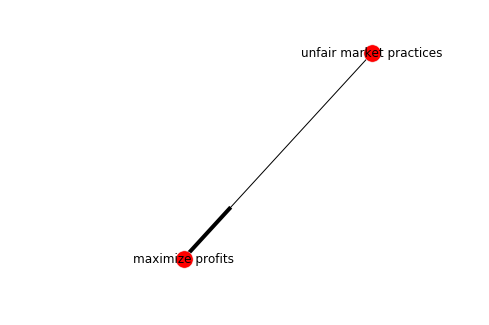

Drawing component of size 2:


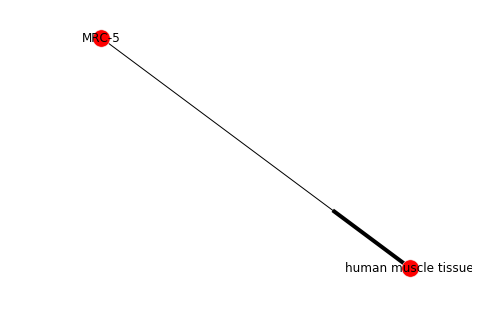

Drawing component of size 2:


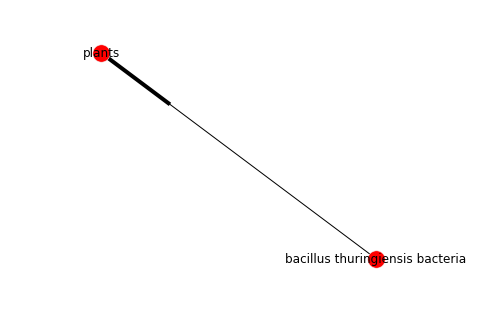

Drawing component of size 2:


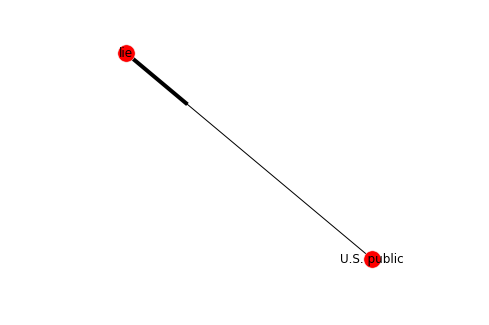

Drawing component of size 2:


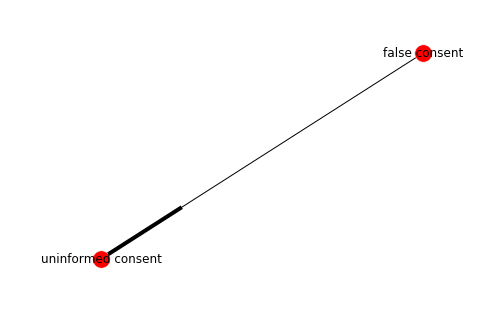

Drawing component of size 2:


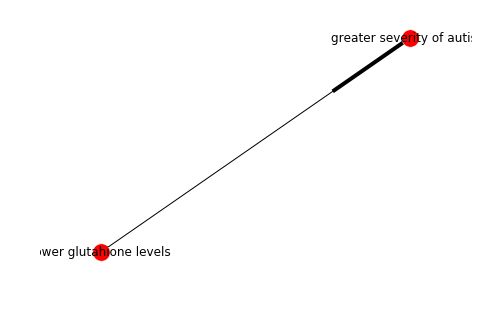

Drawing component of size 2:


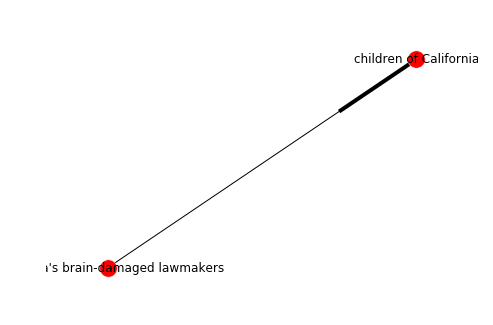

Drawing component of size 2:


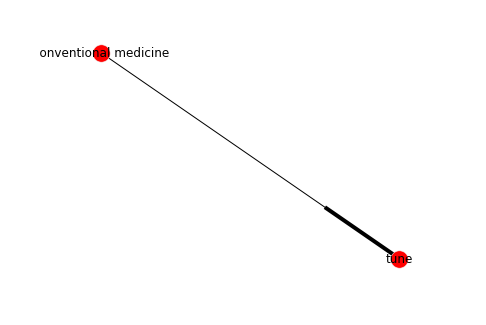

Drawing component of size 2:


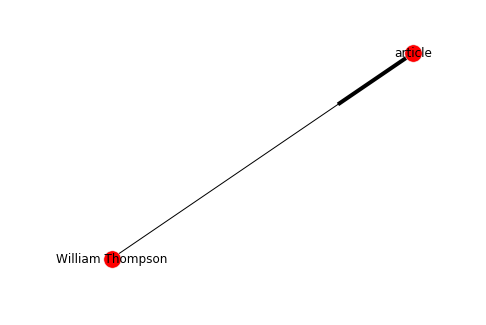

Drawing component of size 2:


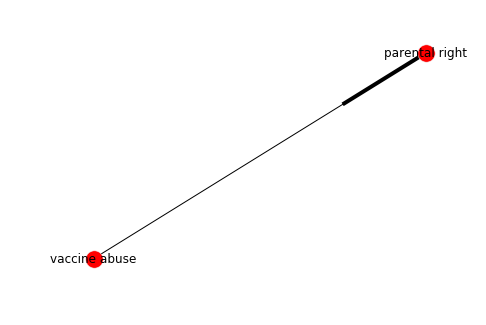

Drawing component of size 2:


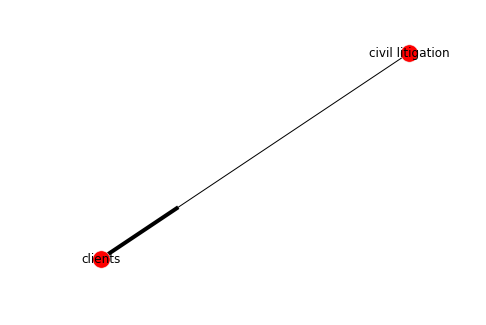

Drawing component of size 2:


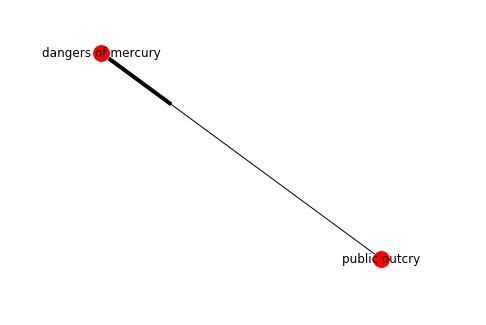

Drawing component of size 2:


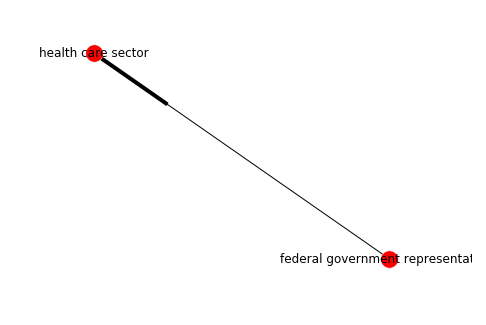

Drawing component of size 2:


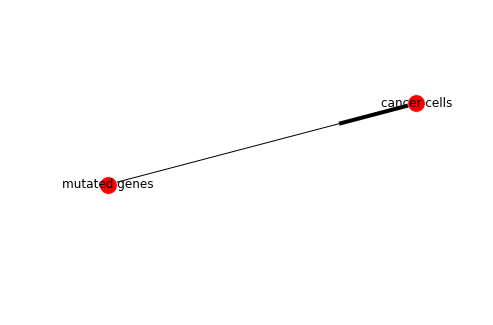

Drawing component of size 2:


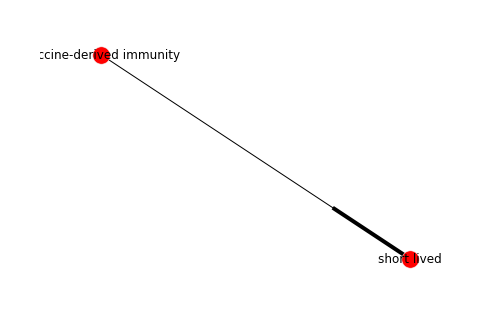

Drawing component of size 2:


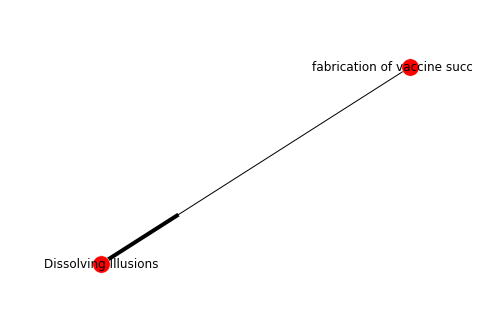

Drawing component of size 2:


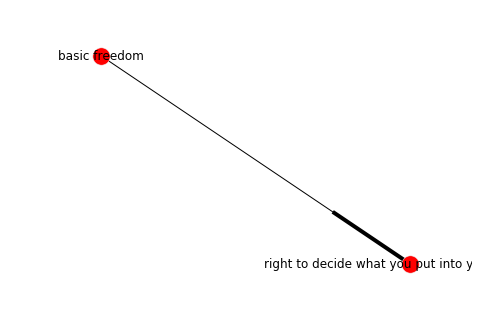

Drawing component of size 2:


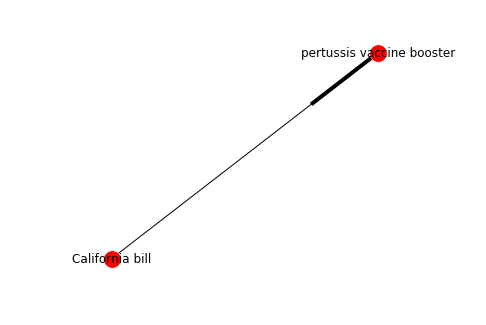

Drawing component of size 2:


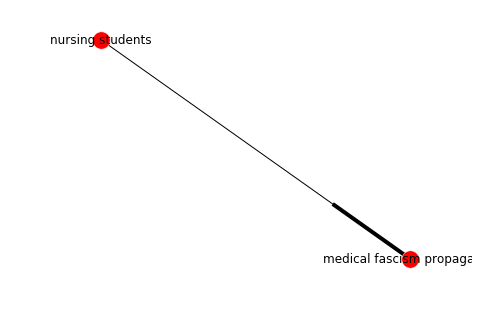

Drawing component of size 2:


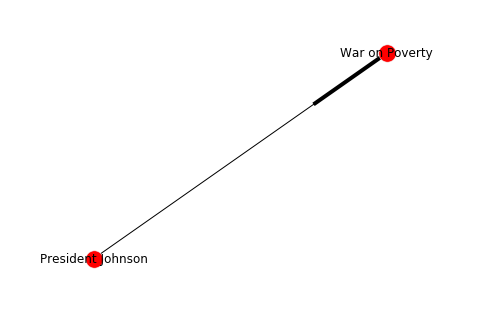

Drawing component of size 2:


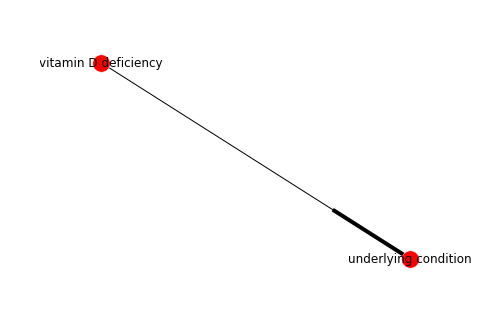

Drawing component of size 2:


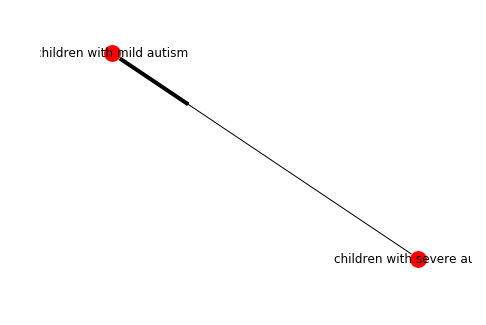

Drawing component of size 2:


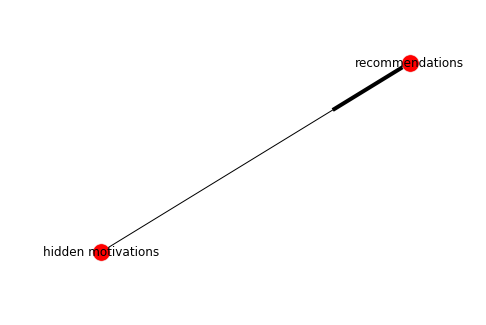

Drawing component of size 2:


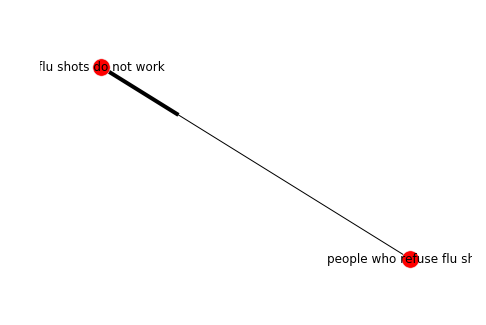

Drawing component of size 2:


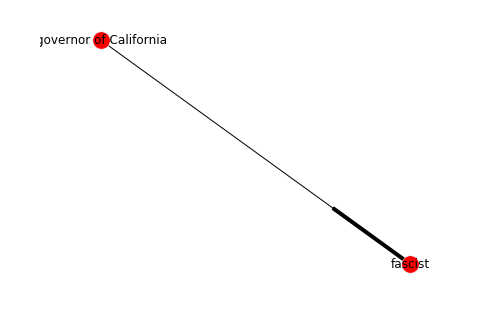

Drawing component of size 2:


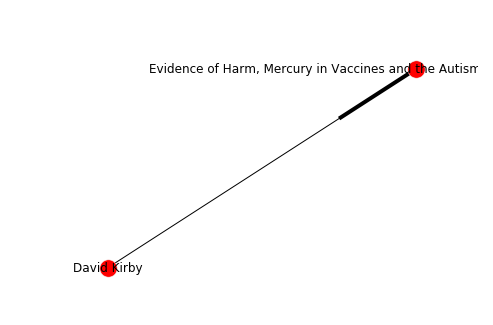

Drawing component of size 2:


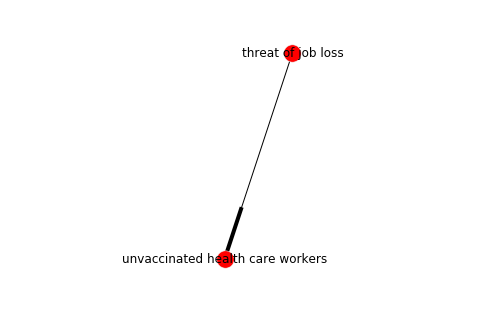

Drawing component of size 2:


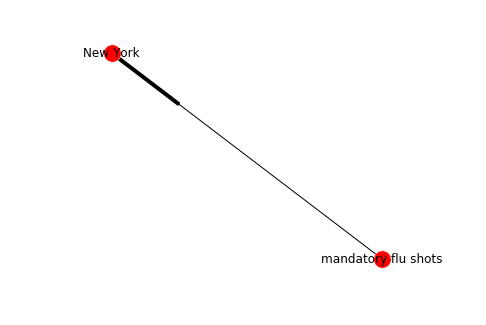

In [24]:
# DIRECTED network graph
describeGraph_d(graph)

## Undirected graph representation

In [40]:
# list of connected components by size (undirected graph)
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

# generate connected components as subgraphs (undirected graph)
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component (undirected MultiGraph)
u_Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
u_Gc.name = "undirected Gc"

In [41]:
print "connected components = ", connected_components
print nx.info(u_Gc)

connected components =  [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: undirected Gc
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035


## Directed graph representation

In [42]:
# use directed graph
components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
cc = [len(c) for c in components]

# generate connected components as subgraphs 
subgraphs = list(nx.weakly_connected_component_subgraphs(graph))

# greatest component
d_Gc = max(nx.weakly_connected_component_subgraphs(graph), key=len)
d_Gc.name = "directed Gc"

In [43]:
print "connected components = ", cc
print nx.info(d_Gc)

connected components =  [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1826
Average in degree:   1.6018
Average out degree:   1.6018


In [46]:
## understand how direction changes degree ##

print nx.info(graph)  # original directed
print nx.info(ugraph)  # to undirected
temp = ugraph.to_directed()  # back to directed
print nx.info(temp)

Name: article_neg1.gml
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099
Name: article_neg1.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199
Name: article_neg1.gml
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 3796
Average in degree:   3.0199
Average out degree:   3.0199


In [47]:
# finally, greatest components for undirected and directed graphs
print nx.info(u_Gc)
print nx.info(d_Gc)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1826
Average in degree:   1.6018
Average out degree:   1.6018


In [48]:
# save Gc
#nx.write_gml(u_Gc, "../output/network/u_Gc_negative.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_negative.gml")

- - -

# Calculate network statistics (averages) for greatest component.

In [49]:
# load directed Gc
Gc_files = glob('../output/network/d_Gc_negative.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [63]:
# Gc_files

for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "neg"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

----------
../output/network/d_Gc_negative.gml
Name: d_Gc_negative.gml
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1826
Average in degree:   1.6018
Average out degree:   1.6018


In [64]:
# print network data for greatest component
network_data

,name,sentiment,# nodes,# edges,density,deg assort coef,avg deg cent,avg bet cent,avg clo cent,high deg cent,high bet cent,high clo cent,avg node conn,# conn comp,gc size
0,d_Gc_negative.gml,neg,1140.0,1826.0,0.0014,-0.0122,0.0028,0.0007,0.0399,"(vaccines, 0.117647058824)","(vaccines, 0.0838129050492)","(vaccine industry, 0.174485053966)",0.2135,1.0,1140.0


In [65]:
# save
#network_data.to_csv('../output/df/Gc_df_neg.csv')

---

# Gc nodes table

In [111]:
gml_files = glob('../output/network/d_Gc_negative.gml')

In [112]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [113]:
# graph = directed, ugraph = undirected
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)

    ## calculate variables and save into list
    sent = "neg"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    #combined_df = combined_df.append(df)

----------
../output/network/d_Gc_negative.gml
Name: d_Gc_negative.gml
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1826
Average in degree:   1.6018
Average out degree:   1.6018


In [114]:
# print negative gc nodes
df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,d_Gc_negative.gml,neg,ACIP,1,0.000878,0.000000,0.085025
1,d_Gc_negative.gml,neg,ACIP's rotavirus use recommendation,1,0.000878,0.000000,0.000000
2,d_Gc_negative.gml,neg,ADHD,1,0.000878,0.000000,0.113547
3,d_Gc_negative.gml,neg,AIDS,1,0.000878,0.000000,0.000000
4,d_Gc_negative.gml,neg,African American males,2,0.001756,0.000000,0.116168
5,d_Gc_negative.gml,neg,African women,3,0.002634,0.000002,0.000878
6,d_Gc_negative.gml,neg,African-American children,1,0.000878,0.000000,0.000000
7,d_Gc_negative.gml,neg,Alysia Osoff,6,0.005268,0.000517,0.107389
8,d_Gc_negative.gml,neg,America,2,0.001756,0.000002,0.001580
9,d_Gc_negative.gml,neg,American Academy of Pediatrics,2,0.001756,0.000264,0.105738


In [115]:
# save
df.to_csv('../output/df/Gc_nodes_neg.csv')

- - -

# Cutsets

In [66]:
print "Greatest component size =", len(graph)

Greatest component size = 1140


In [67]:
# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components

#cutsets = list(nx.all_node_cuts(graph))  # must be undirected

print "Greatest component size =", len(graph)
#print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
min_ncut = nx.minimum_node_cut(graph)
min_ecut = nx.minimum_edge_cut(graph)

print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# min cuts with source and target
print nx.minimum_node_cut(graph, s='vaccines', t='autism')
print nx.minimum_edge_cut(graph, s='vaccines', t='autism')

Greatest component size = 1140
Min node cut = set([])
Min edge cut = set([])
set([u'toxic chemical ingredients', u'vaccine safety', u'vaccine industry', u'doctors', u'vaccine story', u'behavior changes', u'encephalopathy', u'thimerosal', u'vaccine damage', u'children', u'preservative', u'hepatitis B vaccine'])
set([(u'CDC', u'autism'), (u'thimerosal', u'autism'), (u'children', u'autism'), (u'encephalopathy', u'autism'), (u'vaccines', u'autism'), (u'preservative', u'autism'), (u'link', u'autism'), (u'measles', u'autism'), (u'vaccination', u'autism'), (u'deaths', u'hepatitis B vaccine'), (u'CDC whistleblower', u'autism'), (u'vaccine safety', u'autism'), (u'toxic chemical ingredients', u'autism'), (u'vaccine-injured children', u'autism'), (u'public', u'autism')])


In [61]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(graph, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(graph)

labels = nx.get_edge_attributes(graph,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

(u'CDC', u'autism') obscure an existing link between vaccines and
(u'thimerosal', u'autism') appeared to be responsible for drastic increase in
(u'children', u'autism') every year tens of thousands more diagnosed with
(u'encephalopathy', u'autism') caused by vaccines produces a permanent injury and creates symptoms of
(u'vaccines', u'autism') illogical and downright ignorant to suggest that have nothing to do with rise in
(u'preservative', u'autism') in vaccine causes
(u'link', u'autism') existing between vaccines and
(u'measles', u'autism') preferable to
(u'vaccination', u'autism') caused
(u'deaths', u'hepatitis B vaccine') 47 reported from
(u'CDC whistleblower', u'autism') admitting vaccines are linked to
(u'vaccine safety', u'autism') questionable in relation to
(u'toxic chemical ingredients', u'autism') may be significant contributing factor to
(u'vaccine-injured children', u'autism') often revealed to have
(u'public', u'autism') wonders why they have


- - -

# Centrality tables

In [74]:
# make sure you're using the right graph
print "gml_files = ", gml_files
print "gml_graph = ", gml_graph

gml_files =  ['../output/network/article_neg1.gml']
gml_graph =  ../output/network/d_Gc_negative.gml


In [69]:
graph = nx.read_gml('../output/network/article_neg1.gml')  # full network
#graph = nx.read_gml('../output/network/d_Gc_negative.gml')  # gc network

print nx.info(graph)

Name: 
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099


In [70]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [75]:
dc_df

,degree cent
financial collusion,0.000796
toxic heavy metal,0.000796
syncope,0.000796
labor and delivery floor,0.000796
human carcinogen,0.000796
dissenters,0.000796
generous,0.000796
trustworthy,0.000796
human muscle tissue,0.000796
parental right,0.000796


In [76]:
bc_df

,betweenness cent
marketing vaccines to children,0.000000
government contracts,0.000000
pertussis vaccine booster,0.000000
criminal conspiracy,0.000000
healthier children,0.000000
health of children,0.000000
pack of lemmings,0.000000
health authorities,0.000000
poor access to clean water,0.000000
cancer,0.000000


In [77]:
cc_df

,closeness cent
representative,0.000000
Bill of Rights,0.000000
complicated,0.000000
better diagnosis,0.000000
paid damages,0.000000
vaccine consent forms,0.000000
Guillian-Barre Syndrome,0.000000
regional lymphadenopathy,0.000000
greater severity of autism,0.000000
chickenpox,0.000000
